# Example of calculating Pair Potentials

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pairinteraction.real as pi

In [2]:
if pi.Database.get_global_database() is None:
    pi.Database.initialize_global_database(download_missing=True)

In [ ]:
ket = pi.KetAtom("Rb", n=60, l=0, m=0.5)
basis = pi.BasisAtom("Rb", n=(56, 64), l=(0, 3))
print(f"Number of single-atom basis states: {basis.number_of_states}")
system = pi.SystemAtom(basis)

pair_energy = 2 * ket.get_energy(unit="GHz")
min_energy, max_energy = pair_energy - 10, pair_energy + 10

pair_basis = pi.BasisPair([system, system], energy=(min_energy, max_energy), energy_unit="GHz", m=(1, 1))
print(f"Number of two-atom basis states: {pair_basis.number_of_states}")

distances = np.linspace(1, 4, 100)
pair_systems = [pi.SystemPair(pair_basis).set_distance(d, unit="micrometer") for d in distances]

# Diagonalize the systems in parallel
pi.diagonalize(pair_systems, diagonalizer="eigen", sort_by_energy=True)

eigenenergies = np.array([system.get_eigenenergies(unit="GHz") for system in pair_systems])
overlaps = np.array([system.get_eigenbasis().get_overlaps([ket, ket]) for system in pair_systems])

Number of single-atom basis states: 288
Number of two-atom basis states: 547


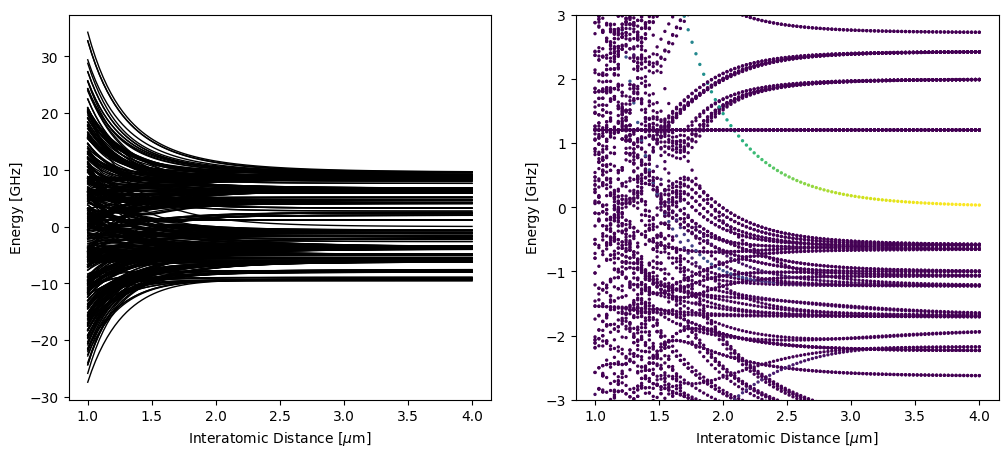

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax in axs:
    ax.set_xlabel(r"Interatomic Distance [$\mu$m]")
    ax.set_ylabel("Energy [GHz]")

axs[0].plot(distances, eigenenergies - pair_energy, c="k", lw=1)

axs[1].scatter(np.repeat(distances, eigenenergies.shape[1]), eigenenergies - pair_energy, c=overlaps, s=2)
axs[1].set_ylim(-3, 3)

plt.show()